In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split, ConcatDataset
from torchvision.utils import save_image
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


transform_aug = transforms.Compose(
    [transforms.RandomHorizontalFlip(p = 0.5),
    transforms.RandomVerticalFlip(p = 0.05),
    torchvision.transforms.ColorJitter(brightness = 0.5, saturation=0.5),
    torchvision.transforms.RandomGrayscale(p=0.2),
    transforms.ToTensor()]
)

# Data Load
aug_dataset = torchvision.datasets.ImageFolder(root="/home/iai/Desktop/Jeewon/Seminar/20230112_MVtecAD/data/simpleclassification_good_bad_aug/dataset", transform = transform_aug)
print(f'Entire Bad Augmentation classes : {aug_dataset.classes}')
print(f'Size of Entire Bad Augmentation classes : {len(aug_dataset)}')



# Counting size of dataset
def get_files_count(folder_path):
	dirListing = os.listdir(folder_path)
	return len(dirListing)

good_dataset = "/home/iai/Desktop/Jeewon/Seminar/20230112_MVtecAD/data/simpleclassification_good_bad/dataset/good"
bad_dataset = "/home/iai/Desktop/Jeewon/Seminar/20230112_MVtecAD/data/simpleclassification_good_bad/dataset/bad"

num_good = get_files_count(good_dataset)
num_bad = get_files_count(bad_dataset)
num_imbalance = num_good - num_bad

print("Size of good dataset : ", num_good)
print("Size of bad dataset : ", num_bad)
print("Class Imbalance : ", num_imbalance)


# Augmentation and save image files
# img_num = 0
# for _ in range(num_imbalance):
#     for img, label in aug_dataset:
#         save_image(img, '/home/iai/Desktop/Jeewon/Seminar/20230112_MVtecAD/data/simpleclassification_good_bad_aug/dataset/bad/img'+str(img_num)+'.png')
#         img_num += 1


print(f'Size of Entire Augmentation classes : {len(aug_dataset)}')

cuda
Entire Bad Augmentation classes : ['bad', 'good']
Size of Entire Bad Augmentation classes : 8192
Size of good dataset :  4096
Size of bad dataset :  1082
Class Imbalance :  3014
Size of Entire Augmentation classes : 8192


In [2]:
num_epochs = 1
batch_size = 1
learning_rate = 0.001


# Tensor -1~1 change
transform = transforms.Compose(
    [transforms.Resize((1000,1000)),
    transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)


# Data Load
image_dataset = torchvision.datasets.ImageFolder(root="/home/iai/Desktop/Jeewon/Seminar/20230112_MVtecAD/data/simpleclassification_good_bad_aug/dataset", transform = transform)
print(f'Entire classes : {image_dataset.classes}')
print(f'Size of Entire classes : {len(image_dataset)}')



# Counting size of dataset
def get_files_count(folder_path):
	dirListing = os.listdir(folder_path)
	return len(dirListing)

good_dataset = "/home/iai/Desktop/Jeewon/Seminar/20230112_MVtecAD/data/simpleclassification_good_bad_aug/dataset/good"
bad_dataset = "/home/iai/Desktop/Jeewon/Seminar/20230112_MVtecAD/data/simpleclassification_good_bad_aug/dataset/bad"

num_good = get_files_count(good_dataset)
num_bad = get_files_count(bad_dataset)

print("Size of good dataset : ", num_good)
print("Size of bad augmented dataset : ", num_bad)
print(f'Size of Entire classes : {len(image_dataset)}')

Entire classes : ['bad', 'good']
Size of Entire classes : 8192
Size of good dataset :  4096
Size of bad augmented dataset :  4096
Size of Entire classes : 8192


Size of entire dataset : 8192
Size of train dataset : 6553
Size of train dataset : 1639


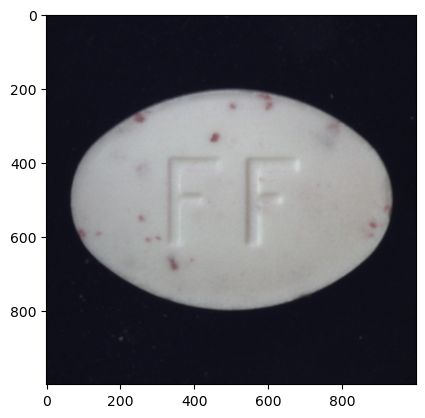

torch.Size([1, 3, 1000, 1000])


In [3]:
train_size = int(0.8 * len(image_dataset))
test_size = len(image_dataset) - train_size

train_dataset, test_dataset = random_split(image_dataset, [train_size, test_size])


print(f'Size of entire dataset : {len(image_dataset)}')
print(f'Size of train dataset : {len(train_dataset)}')
print(f'Size of train dataset : {len(test_dataset)}')

train_loader = DataLoader(train_dataset, batch_size = 1, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 1, shuffle = False)


def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(images.shape)

In [4]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        self.conv3 = nn.Conv2d(16,32,5)
        self.pool1 = nn.MaxPool2d(4,4)
        self.pool2 = nn.MaxPool2d(5,5)
        self.fc1 = nn.Linear(32*9*9, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)
        
    def forward(self,x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool2(F.relu(self.conv3(x)))
        x = x.view(-1, 32*9*9)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

n_total_steps = len(train_loader)

Epoch [1/1], Step [500/6553], Loss: 0.6555
Epoch [1/1], Step [1000/6553], Loss: 0.6508
Epoch [1/1], Step [1500/6553], Loss: 0.7306
Epoch [1/1], Step [2000/6553], Loss: 0.6637
Epoch [1/1], Step [2500/6553], Loss: 0.7032
Epoch [1/1], Step [3000/6553], Loss: 0.6803
Epoch [1/1], Step [3500/6553], Loss: 0.6796
Epoch [1/1], Step [4000/6553], Loss: 0.7065
Epoch [1/1], Step [4500/6553], Loss: 0.6961
Epoch [1/1], Step [5000/6553], Loss: 0.6990
Epoch [1/1], Step [5500/6553], Loss: 0.6969
Epoch [1/1], Step [6000/6553], Loss: 0.6913
Epoch [1/1], Step [6500/6553], Loss: 0.6677
Training done


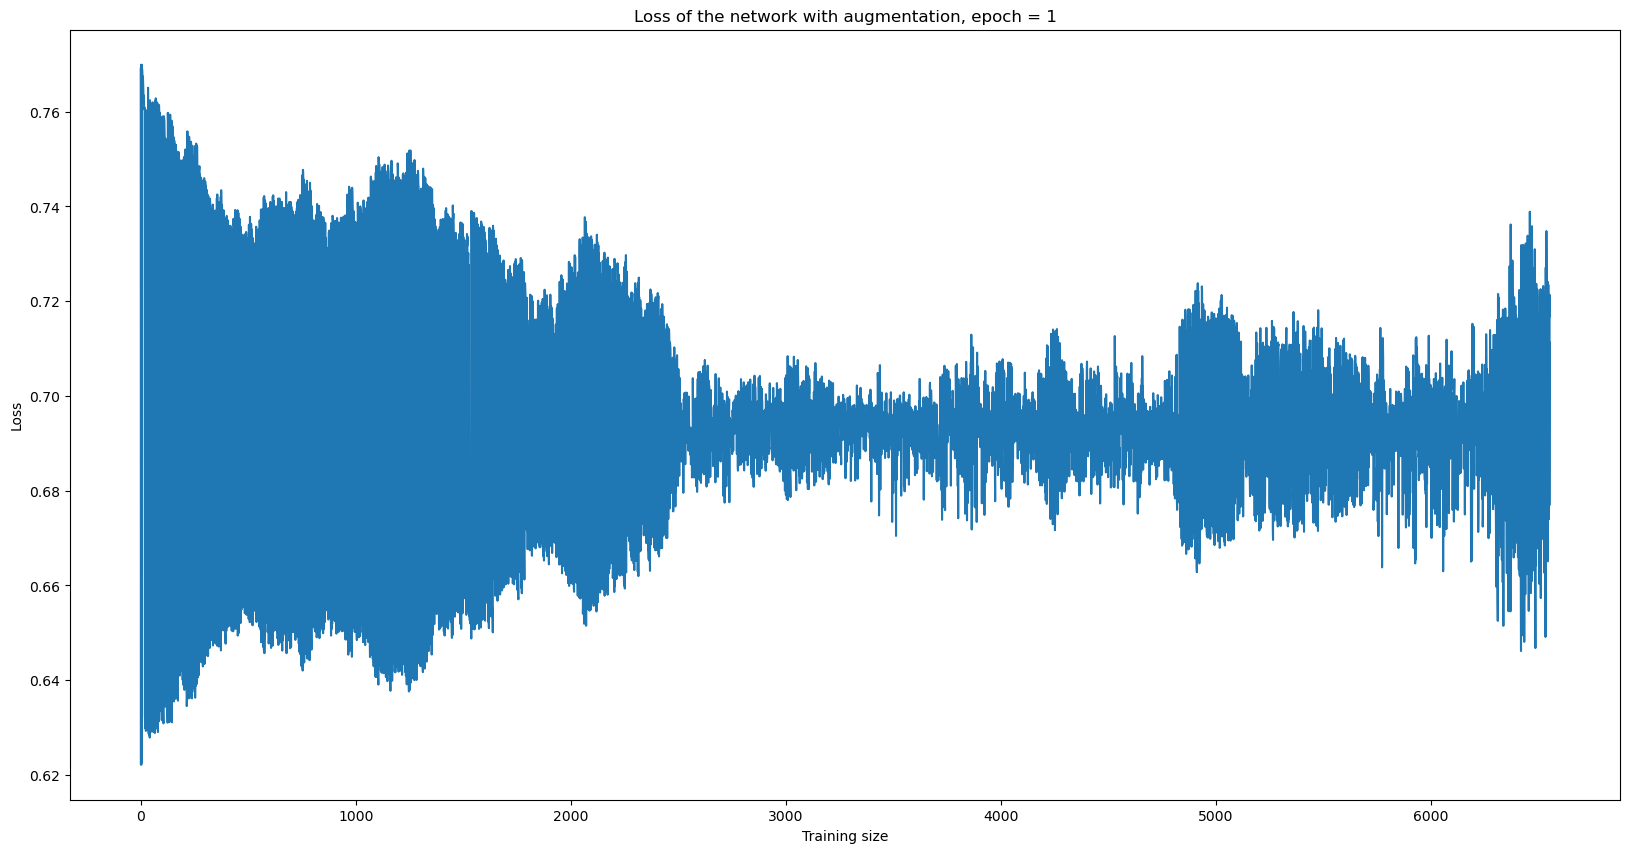

In [5]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

loss_list = []
# training phase
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        loss_list.append(loss.item())
        
        if (i+1) %500 == 0:
            print (f'Epoch [{epoch+1}/1], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
            
print("Training done")

plt.figure(figsize=(20,10))
plt.plot(loss_list)
plt.xlabel('Training size')
plt.ylabel('Loss')
plt.title('Loss of the network with augmentation, epoch = 1')
plt.show()

Accuracy of the network : 49.35936546674802 %


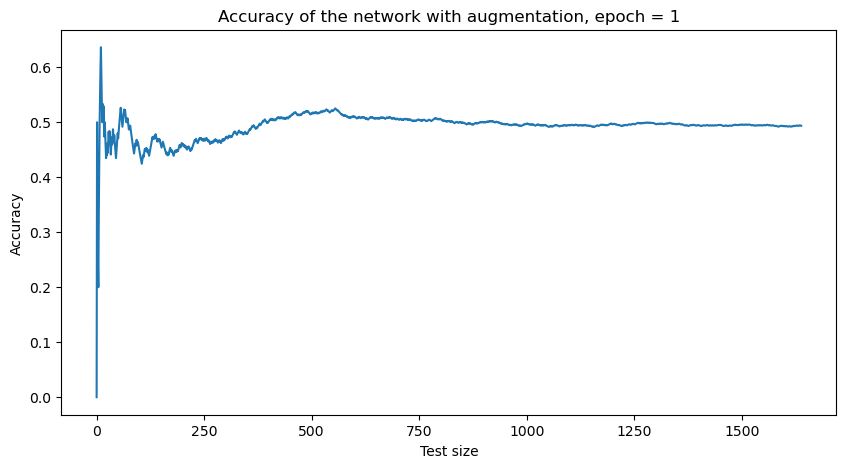

In [6]:
acc_list = []
accuracy = 0.0

# test phase
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(2)]
    n_class_samples = [0 for i in range(2)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)

        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1
        
        acc_list.append(n_correct/n_samples)
    
    accuracy = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network : {accuracy} %')

plt.figure(figsize=(10,5))
plt.plot(acc_list)
plt.xlabel('Test size')
plt.ylabel('Accuracy')
plt.title('Accuracy of the network with augmentation, epoch = 1')
plt.legend
plt.show()